<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Imbalance_classification_credit_card_dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is a modified version of the notebook from here: https://github.com/aapatel09/handson-unsupervised-learning

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.linear_model import LogisticRegression

In [3]:
!wget https://github.com/MindaugasBernatavicius/DeepLearningCourse/blob/master/04_ML_Intro/cc_fraud_data.zip?raw=true -O cc_fraud_data.zip

--2021-11-22 16:49:45--  https://github.com/MindaugasBernatavicius/DeepLearningCourse/blob/master/04_ML_Intro/cc_fraud_data.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/04_ML_Intro/cc_fraud_data.zip [following]
--2021-11-22 16:49:45--  https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/04_ML_Intro/cc_fraud_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/04_ML_Intro/cc_fraud_data.zip [following]
--2021-11-22 16:49:46--  https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/04_ML_Intro/cc_fraud_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 1

In [4]:
!sudo apt-get install p7zip-full p7zip-rar
!7za x cc_fraud_data.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following NEW packages will be installed:
  p7zip-rar
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 43.1 kB of archives.
After this operation, 113 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 p7zip-rar amd64 16.02-2 [43.1 kB]
Fetched 43.1 kB in 0s (101 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package p7zip

In [5]:
!ls -laht cc_fraud_data

total 144M
drwxr-xr-x 1 root root 4.0K Nov 22 16:50 ..
drwx------ 2 root root 4.0K Nov 18 13:59 .
-rw-r--r-- 1 root root 144M Sep 19  2019 creditcard.csv


In [6]:
data = pd.read_csv('cc_fraud_data/creditcard.csv')

In [7]:
data.shape

(284807, 31)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [12]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
# # Generate feature matrix and labels array 
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [ ]:
# standartization

featuresToScale = dataX.drop(['Time'],axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [17]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [18]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)

for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

cm = sns.light_palette("green", as_cmap=True)
correlationMatrix.style.background_gradient(cmap=cm)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.120000,-0.010000,-0.420000,-0.110000,0.170000,-0.060000,0.080000,-0.040000,-0.010000,0.030000,-0.250000,0.120000,-0.070000,-0.100000,-0.180000,0.010000,-0.070000,0.090000,0.030000,-0.050000,0.040000,0.140000,0.050000,-0.020000,-0.230000,-0.040000,-0.010000,-0.010000,-0.010000
V1,0.120000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.230000
V2,-0.010000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.530000
V3,-0.420000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.210000
V4,-0.110000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.100000
V5,0.170000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.390000
V6,-0.060000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.220000
V7,0.080000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.400000
V8,-0.040000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.100000
V9,-0.010000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.040000


In [19]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.1,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,-0,-0,-0,0,0,0,-0,0,0,0,0,-0,0,-0,0,-0,0,0,0,-0,0,0,-0,-0,-0,0,0,-0.23
V2,-0.01,-0,1,0,-0,0,0,-0,-0,-0,-0,0,-0,-0,-0,0,0,-0,0,0,0,0,0,0,-0,0,0,-0,-0,-0.53
V3,-0.42,-0,0,1,-0,-0,0,0,-0,0,0,0,0,0,0,-0,0,-0,0,0,0,-0,-0,-0,0,0,-0,0,0,-0.21
V4,-0.11,-0,-0,-0,1,-0,-0,-0,0,0,-0,-0,-0,0,-0,0,-0,-0,-0,-0,-0,-0,0,0,0,0,-0,-0,-0,0.1
V5,0.17,0,0,-0,-0,1,0,-0,0,0,0,0,0,-0,0,0,0,0,0,-0,-0,-0,0,0,-0,-0,0,0,-0,-0.39
V6,-0.06,0,0,0,-0,0,1,0,-0,-0,0,0,0,-0,0,-0,-0,0,0,0,0,-0,-0,0,-0,0,-0,-0,0,0.22
V7,0.08,0,-0,0,-0,-0,0,1,-0,-0,0,-0,0,-0,0,-0,0,0,0,-0,0,0,-0,-0,0,0,-0,-0,0,0.4
V8,-0.04,-0,-0,-0,0,0,-0,-0,1,0,-0,0,0,-0,-0,0,0,-0,-0,-0,0,0,0,0,-0,-0,0,0,-0,-0.1
V9,-0.01,0,-0,0,0,0,-0,-0,0,1,-0,0,-0,0,0,-0,-0,0,0,0,-0,0,-0,-0,-0,0,-0,-0,0,-0.04


In [20]:
correlationMatrix.to_csv('correlationMatrix.csv')

Text(0, 0.5, 'Frequency Percentage')

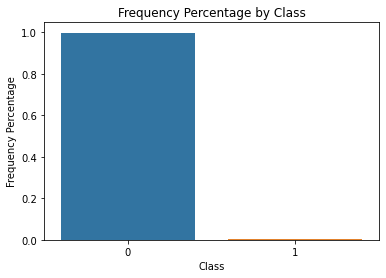

In [21]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

### Feature engineering and feature selection
In most machine learning projects, we should consider feature engineering and feature selection as part of the solution. Feature engineering involves creating new features—for example, calculating ratios or counts or sums from the original features—to help the machine learning algorithm extract a stronger signal from the dataset.

Feature selection involves selecting a subset of the features for training, effectively removing some of the less relevant features from consideration. This may help prevent the machine learning algorithm from overfitting to the noise in the dataset.

For this credit card fraud dataset, we do not have the original features. We have only the principal components, which were derived from PCA, a form of dimensionality reduction that we will explore latter. Since we do not know what any of the features represent, we cannot perform any intelligent feature engineering.

Feature selection is not necessary either since the number of observations (284,807) vastly outnumbers the number of features (30), which dramatically reduces the chances of overfitting. And, as Figure 2-1 shows, the features are only slightly correlated to each other. In other words, we do not have redundant features. If we did, we could remove or reduce the redundancy via dimensionality reduction. Of course, this is not a surprise. PCA was already performed on this credit card dataset, removing the redundancy for us.

In [22]:
# Model preparation (stratify parameter)

X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [23]:
len(X_train)

190820

In [24]:
len(X_test)

93987

In [25]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [26]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [34]:
dataY[dataY==1]

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [35]:
len(dataY[dataY==1])

492

In [39]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [36]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [37]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

In [38]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.044478e-17,-4.095991e-18,-2.224868e-18,1.342368e-17,-4.822099e-18,4.133227e-18,2.736867e-18,4.766244e-18,-6.590822e-18,-2.364504e-18,1.697974e-17,-1.779894e-17,1.228797e-17,5.510970e-18,-1.046340e-17,-2.755485e-18,-6.479113e-18,-1.064958e-17,7.633438e-18,-2.271413e-18,-2.532067e-18,2.241624e-17,3.798101e-18,-1.356332e-17,1.444768e-17,-1.954905e-18,1.340506e-18,-4.915189e-18,7.037657e-18
StDev,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [33]:
# Logistic regression

penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, random_state=random_state, solver=solver, n_jobs=n_jobs)

We will set the penalty to the default value L2 instead of L1. Compared to L1, L2 is less sensitive to outliers and will assign nonzero weights to nearly all the features, resulting in a stable solution. L1 will assign high weights to the most important features and near-zero weights to the rest, essentially performing feature selection as the algorithm trains. However, because the weights vary so much feature to feature, the L1 solution is not as stable to changes in data points as the L2 solution.

C is the regularization strength. As you may recall that regularization helps address overfitting by penalizing complexity. In other words, the stronger the regularization, the greater the penalty the machine learning algorithm applies to complexity. Regularization nudges the machine learning algorithm to prefer simpler models to more complex ones, all else equal. This regularization constant, C, must be a positive floating number. The smaller the value, the stronger the regularization.

Our credit card transactions dataset is very imbalanced—out of all the 284,807 cases, only 492 are fraudulent. As the machine learning algorithm trains, we want the algorithm to focus more attention on learning from the positive labeled transactions—in other words, the fraudulent transactions—because there are so few of them in the dataset. For this logistic regression model, we will set the class_weight to balanced. This signals to the logistic regression algorithm that we have an imbalanced class problem; the algorithm will need to weigh the positive labels more heavily as it trains. In this case, the weights will be inversely proportional to the class frequencies; the algorithm will assign higher weights to the rare positive labels (i.e., fraud) and lower weights to the more frequent negative labels (i.e., not fraud).

In [40]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)) ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10951971835989575
CV Log Loss:  0.10867363423100346
Training Log Loss:  0.10456971116643966
CV Log Loss:  0.10404102463032529
Training Log Loss:  0.11536630915990131
CV Log Loss:  0.11759709957679597
Training Log Loss:  0.1155564445021791
CV Log Loss:  0.11815142246445215
Training Log Loss:  0.09705008926547341
CV Log Loss:  0.09701778957029364
Logistic Regression Log Loss:  0.10909619409457409


Generally (but not always) the training log loss will be lower than the cross-validation log loss. Because the machine learning algorithm has learned directly from the training data, its performance (i.e., log loss) should be better on the training set than on the cross-validation set.

For each of the five runs, their training and cross-validation log losses are similar. The logistic regression model does not exhibit severe overfitting; if it did, we would have a low training log loss and comparably high cross-validation log loss.

In [53]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

preds

,trueLabel,prediction
142087,0,0.000816913
165168,0,0.0318412
235908,0,0.159728
148255,0,0.00676718
145672,0,0.0369778
...,...,...
30023,0,0.251246
195475,0,0.0393912
48687,0,0.0185369
159608,0,0.00469561


In [54]:
preds[preds['trueLabel'] == 1]

,trueLabel,prediction
154633,1,1
68522,1,1
77348,1,1
234633,1,1
249963,1,1
...,...,...
42958,1,1
95597,1,1
55401,1,0.25521
57248,1,0.354906


In [56]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
precision
recall
len(thresholds)

184591

In [43]:
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

A solution with high recall but low precision returns many results—capturing many of the positives—but with many false alarms. A solution with high precision but low recall is the exact opposite; it returns few results—capturing a fraction of all the positives in the dataset—but most of its predictions are correct. To put this into context, if our solution had high precision but low recall, there would be a very small number of fraudulent transactions found but most would be truly fraudulent. However, if the solution had low precision but high recall it would flag many of the transactions as fraudulent, thus catching a lot of the fraud, but most of the flagged transactions would not be fraudulent. Obviously, both solutions have major problems. In the high precision–low recall case, the credit card company would lose a lot of money due to fraud, but it would not antagonize customers by unnecessarily rejecting transactions. In the low precision-high recall case, the credit card company would catch a lot of the fraud, but it would most certainly anger customers by unnecessarily rejecting 

Note: The choice of the threshold is a very important one and usually involves the input of business decision makers.

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

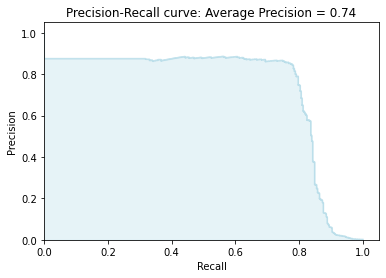

In [58]:
plt.step(recall, precision, color='lightblue', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='lightblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

In [48]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [49]:
areaUnderROC = auc(fpr, tpr)

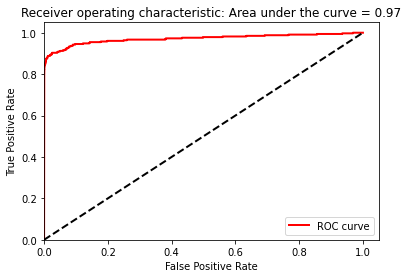

In [57]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [59]:
!wget https://github.com/MindaugasBernatavicius/DeepLearningCourse/blob/master/04_ML_Intro/cc_fraud_data.zip?raw=true -O cc_fraud_data.zip
!sudo apt-get install p7zip-full p7zip-rar
!7za x cc_fraud_data.zip -y

--2021-11-22 19:02:28--  https://github.com/MindaugasBernatavicius/DeepLearningCourse/blob/master/04_ML_Intro/cc_fraud_data.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/04_ML_Intro/cc_fraud_data.zip [following]
--2021-11-22 19:02:29--  https://github.com/MindaugasBernatavicius/DeepLearningCourse/raw/master/04_ML_Intro/cc_fraud_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/04_ML_Intro/cc_fraud_data.zip [following]
--2021-11-22 19:02:29--  https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/04_ML_Intro/cc_fraud_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 1

In [61]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

from sklearn import preprocessing
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.linear_model import LogisticRegression

data = pd.read_csv('cc_fraud_data/creditcard.csv')
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

Training Log Loss:  0.10951353746607272
CV Log Loss:  0.10867783336234717
Training Log Loss:  0.10460227416593064
CV Log Loss:  0.10407451870069642
Training Log Loss:  0.1155100269830853
CV Log Loss:  0.11787700644717178
Training Log Loss:  0.11552991927823339
CV Log Loss:  0.11812642817093104
Training Log Loss:  0.09713987415636184
CV Log Loss:  0.09707857057711211
Logistic Regression Log Loss:  0.10916687145165169


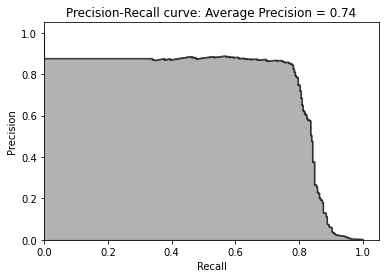

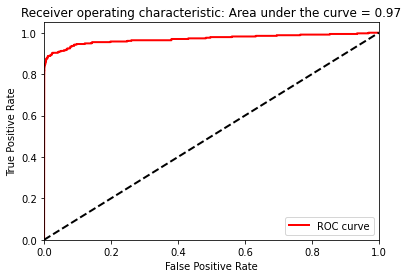

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify=dataY)

featuresToScale = dataX.drop(['Time'],axis=1).columns

sX = preprocessing.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)


penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, random_state=random_state, solver=solver, n_jobs=n_jobs)

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)) ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))
plt.show()

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()